In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# !pip3 install numpy pandas seaborn matplotlib

In [3]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

### Exploring Categories

In [5]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

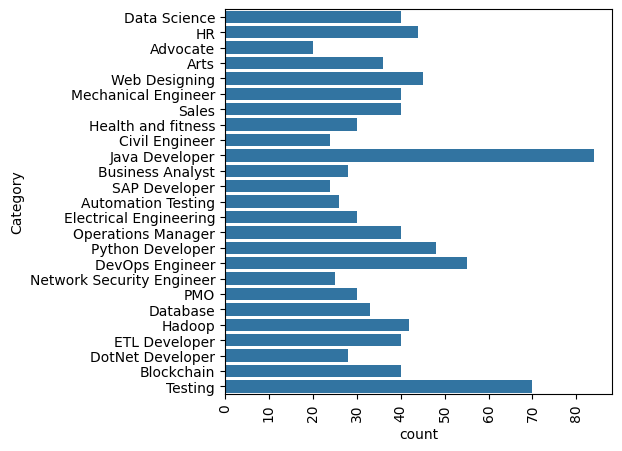

In [6]:
plt.figure(figsize=(5,5))
sns.countplot(df["Category"])
plt.xticks(rotation=90)
plt.show()

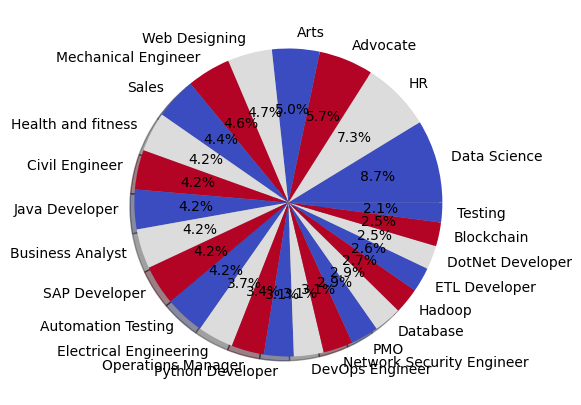

In [7]:
count = df["Category"].value_counts()
labels = df.Category.unique()
plt.figure(figsize=(15,5))
plt.pie(count, labels=labels, autopct='%1.1f%%', colors=plt.cm.coolwarm(np.linspace(0,1,3)), 
        shadow=True)
plt.show()

### Exploring Resume 

In [8]:
df['Category'][0]

'Data Science'

In [9]:
df.Resume[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

### Cleaning Data
    1. URLs
    2. Hashtags
    3. Mentions
    4. Special Letters
    5. Punctuations

In [10]:
import re

def cleanresume(txt):
    cleantxt = re.sub('http\S+\s'," ", txt)
    cleantxt = re.sub('RT|cc+ '," ", cleantxt)
    cleantxt = re.sub('@\S+'," ", cleantxt)
    cleantxt = re.sub('#\S+\s'," ", cleantxt)
    cleantxt = re.sub('[%s]'% re.escape("""!"#$%&'()*+,./:;<=>?@[\]^_`{|}~""")," ", cleantxt)
    cleantxt = re.sub(r'[^\x00-\x7f]'," ", cleantxt) 
    cleantxt = re.sub('\s+'," ", cleantxt)
    return cleantxt

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/var/folders/p5/4v17xqy54_7_0wvrnlnjmcq40000gn/T/ipykernel_21601/1046092804.py:4: SyntaxWarning: invalid escape sequence '\S'
  cleantxt = re.sub('http\S+\s'," ", txt)
/var/folders/p5/4v17xqy54_7_0wvrnlnjmcq40000gn/T/ipykernel_21601/1046092804.py:6: SyntaxWarning: invalid escape sequence '\S'
  cleantxt = re.sub('@\S+'," ", cleantxt)
/var/folders/p5/4v17xqy54_7_0wvrnlnjmcq40000gn/T/ipykernel_21601/1046092804.py:7: SyntaxWarning: invalid escape sequence '\S'
  cleantxt = re.sub('#\S+\s'," ", cl

In [11]:
df['Resume'] = df.Resume.apply(lambda x: cleanresume(x))

In [12]:
df.Resume[90]

'Skills Natural Languages Proficient in English Hindi and Marathi Computer skills Proficient with MS-Office Internet operation Education Details January 2015 to January 2018 LLB Law Mumbai Maharashtra Mumbai university January 2015 B M M Mumbai Maharashtra S K Somaiya College Mumbai University H S C Asmita Girls junior College Maharashtra Board S S C Vidya Bhawan Maharashtra Board Advocate Llb student and Journalist Skill Details Company Details company - Criminal lawyer law firm description - '

### Words into Categorical Values

In [13]:
# !pip3 install scikit-learn

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
le.fit(df.Category)
df.Category = le.transform(df.Category)

In [16]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

### Vectorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredtext = tfidf.transform(df.Resume)

In [18]:
requiredtext

<962x7350 sparse matrix of type '<class 'numpy.float64'>'
	with 164132 stored elements in Compressed Sparse Row format>

### Splitting

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(requiredtext, df.Category, test_size=0.2, random_state=42)

### Now let's train the model and print the classification report

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

clf = OneVsOneClassifier(KNeighborsClassifier())
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(y_pred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [24]:
accuracy_score(y_test, y_pred)

0.9844559585492227

### Prediction System 

In [26]:
import pickle as pi
pi.dump(tfidf, open('tfidf.pkl', 'wb'))
pi.dump(clf, open('clf.pkl', 'wb'))

In [ ]:
# Load the trained classifier 
clf = pi.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanresume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier 
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
            15: "Java Developer",
            23: "Testing",
            8: "DevOps Engineer",
            20: "Python Developer",
            24: "Web Designing",
            12: "HR",
            13: "Hadoop",
            3: "Blockchain",
            10: "ETL Developer",
            18: "Operations Manager",
            6: "Data Science",
            22: "Sales",
            16: "Mechanical Engineer",
            1: "Arts",
            7: "Database",
            11: "Electrical Engineering",
            14: "Health and fitness",
            19: "PMO",
            4: "Business Analyst",
            9: "DotNet Developer",
            2: "Automation Testing",
            17: "Network Security Engineer",
            21: "SAP Developer",
            5: "Civil Engineer",
            0: "Advocate",
        }

category_name = category_mapping.get(prediction_id, "Unknown")

print("Prediction Category : ", category_name)